In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline


import datetime
import numpy as np
import matplotlib.pyplot as plt


from CloudSaturation import CloudSaturation

from Utils import *


In [44]:
# Requesting size of Slovenia BB results in error "The bounding box area is too large! Please zoom in."
#tulip_box = [52.85905593845727, 4.71038818359375,52.91204098150524, 4.798278808593751]
full_tulip_box = [52.82601970123596, 4.684766350546853,52.93210351553535, 4.860547600546853]
tulip_box = [52.981923, 4.577823, 52.762686, 5.224698] #Den_Helder
#tulip_box = [52.762686, 4.577823, 52.356392, 5.224698]
#tulip_box = [52.981923, 4.577823, 52.356392, 5.224698]
#tulip_box = [52.322227, 4.395521, 52.174074, 4.620172] 
#tulip_box = [52.840049, 5.560622,52.472093, 6.085825] #Emmeloord
#tulip_box = [51.856642, 3.978766,51.646933, 4.354802]
tulip_box = [52.900789, 4.709721, 52.800126, 4.865626]
cloud_sat = CloudSaturation(tulip_box, cloud_scale=6)

In [45]:
#mask, true_c, bands, dates, cloud_masks = cloud_sat.get_cloud_saturation_mask()
true_color, dates = cloud_sat.load_tc()
#mask_full, true_c_full, bands, dates_full, cloud_masks_full = netherlands_cloud.get_cloud_saturation_mask()

True color


In [46]:
true_color[-1].shape

(1120, 1047, 4)

In [47]:
# Layers from geopedia that currently work (Also see CloudSaturation.py)
# layers = {'tulip_field_2016':'ttl1904', 'tulip_field_2017':'ttl1905', 'arable_land_2017':'ttl1917'}

# Get dataseries for same region (to reuse cloud data)
field, mask_t, nonzero = cloud_sat.get_tulip_mask("tulip_field_2016")
#field_full, mask_full_t, nonzero_full = netherlands_cloud.get_tulip_mask("tulip_field_2016")
# Nonzero contains nonzero indices (tulips ARE on such index), see later code for correst indexing

Downloaded from http://service.geopedia.world/wms/ml_aws?service=WMS&request=GetMap&styles=&format=image%2Fpng&transparent=false&version=1.1.1&layers=ttl1904&height=1120&width=1047&srs=EPSG:3857&bbox=524283.7434983876,6964667.613586511,541639.0087105136,6946111.878701824


In [48]:
dates

[datetime.datetime(2016, 3, 12, 10, 50, 37),
 datetime.datetime(2016, 4, 11, 10, 50, 25),
 datetime.datetime(2016, 4, 21, 10, 50, 29),
 datetime.datetime(2016, 5, 1, 10, 53, 10),
 datetime.datetime(2016, 5, 11, 10, 53, 43),
 datetime.datetime(2016, 9, 8, 10, 54, 16),
 datetime.datetime(2017, 1, 26, 10, 53, 15),
 datetime.datetime(2017, 2, 15, 10, 56, 7),
 datetime.datetime(2017, 3, 27, 10, 50, 21),
 datetime.datetime(2017, 5, 26, 10, 55, 18),
 datetime.datetime(2017, 8, 29, 10, 50, 21),
 datetime.datetime(2017, 9, 23, 10, 50, 22),
 datetime.datetime(2017, 11, 7, 10, 52, 25),
 datetime.datetime(2017, 12, 17, 10, 54, 33)]

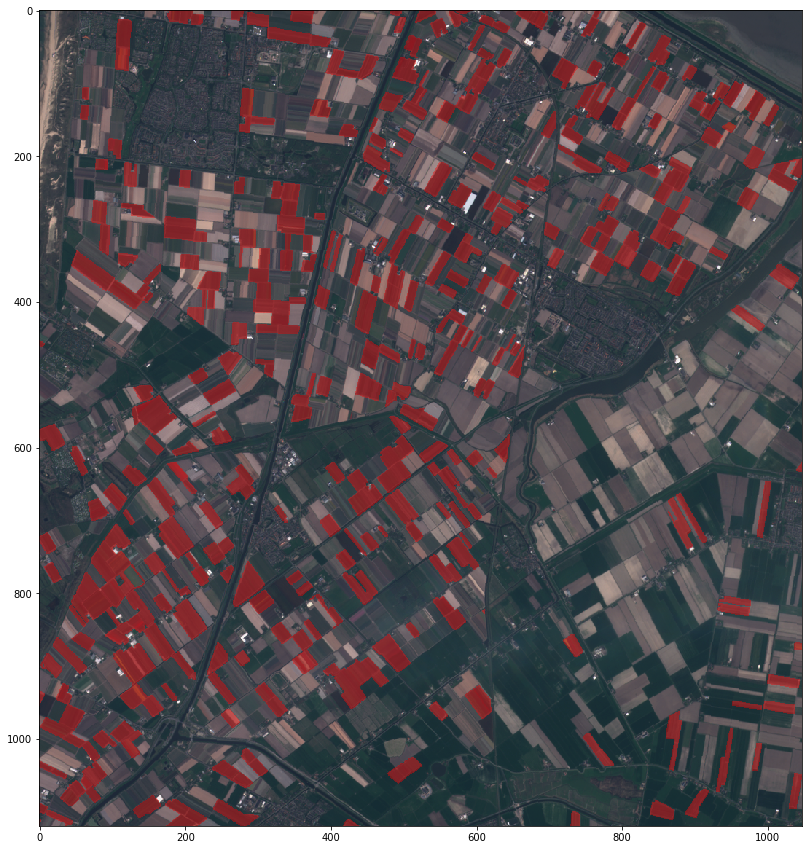

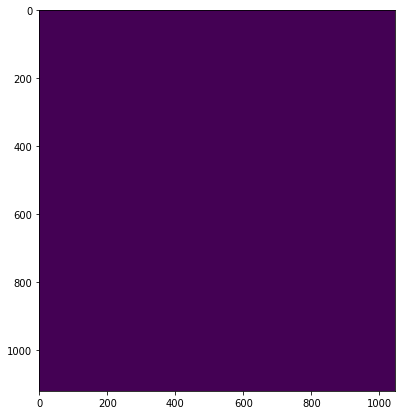

In [49]:
# If mask_maps is not None, for every image in images, each is overlayed with different color
overlay_cloud_mask(true_color[2], [mask_t], mask_maps = [[255, 0, 0]])
plot_image(true_color[-2][:, :, 3])

In [8]:
true_color[-1]

array([[[ 88,  63,  44, 255],
        [ 88,  61,  43, 255],
        [ 87,  57,  41, 255],
        ...,
        [114,  87,  78, 255],
        [112,  86,  77, 255],
        [113,  88,  78, 255]],

       [[ 90,  65,  47, 255],
        [ 90,  62,  43, 255],
        [ 88,  60,  42, 255],
        ...,
        [112,  88,  78, 255],
        [113,  86,  75, 255],
        [110,  86,  75, 255]],

       [[ 87,  63,  46, 255],
        [ 86,  60,  43, 255],
        [ 89,  61,  42, 255],
        ...,
        [111,  88,  74, 255],
        [111,  87,  76, 255],
        [110,  87,  78, 255]],

       ...,

       [[ 91,  64,  50, 255],
        [ 90,  67,  50, 255],
        [ 89,  67,  48, 255],
        ...,
        [ 91,  69,  56, 255],
        [ 93,  75,  64, 255],
        [ 91,  74,  55, 255]],

       [[ 91,  65,  49, 255],
        [ 89,  67,  47, 255],
        [ 89,  66,  45, 255],
        ...,
        [ 90,  66,  51, 255],
        [ 88,  66,  52, 255],
        [ 89,  68,  52, 255]],

       [[ 91